
# Soirée de prog #5 option B: applications web avec Django

2022-06-27, 19h00 à 21h00 EDT

![](https://www.fullstackpython.com/img/logos/django.png)



Voir [ce document](https://docs.google.com/document/d/1VA6s5UpuEk_qc7MACX_XK1KyuGm1IWu7CF4p420vR58/edit) pour le programme détaillé de ce qui nous allons faire aujoud'hui, et voir [le document parent](https://docs.google.com/document/d/1Thp26TK1AAWGzq_jtIlJ_xTfZq5khTy4NYh_au_A3Qo/edit) pour les infos de l'evenment en general.


Cet atelier portera sur la création de sites Web alimenté par une base de données à l'aide du framework [Django](https://fr.wikipedia.org/wiki/Django_(framework)). Nous verrons les étapes de la création d'une application web simple à partir de zéro.


#### Objectif general

Chacun de nous va créer un site personnel avec une liste de recommandations de livres.

#### Prérequis

* Connaissances de base de Python
* Poste de travail (desktop ou laptop, windows, linux ou mac)
* Fureteur web (eg. Firefox)  
* Téléchargez et installez l'application [JupyterLab Desktop](https://github.com/jupyterlab/jupyterlab-desktop#download) sur votre ordinateur


## Étape 0: Préparation de l'environnement de programmation

* Téléchargez et Installez [JupyterLab Desktop](https://github.com/jupyterlab/jupyterlab-desktop#download) (si ce n'a pas déjà été fait)
* Ouvrir l'application JupyterLab Desktop
* Naviguez en utilisant le menu à gauche vers un dossier où nous allons travailler  
  (eg. `C:\\Users\<nom>\Documents` sous windows our `/home/<nom>/Documents` sous UNIX)
* Téléchargez le fichier zip suivant sauvegardez le dans le même dossier
* Désarchiver le fichier
  * vous devriez voir le dossier "DjangoTutorialFR" apparaître (refresh au besoin)
* Ouvrez le dossier "DjangoTutorialFR" 
  * vous devriez voir trois notebooks et un répertoire monproj
* Ouvrez le notebook django.ipynb
  * Le notebook django.ipynb sera notre principal lieu de travail. Nous allons l'utiliser pour exécuter trois sortes de commandes:
    * \[1\]: `2+3`  (commandes Python)
    * \[1\]: `%pwd` (commandes «[magiques](https://ipython.readthedocs.io/en/stable/interactive/magics.html)» de IPython)
    * \[1\]: `!mkdir mondossier` (commandes système)

### Exemples de commandes

In [1]:
# Python
2+3

5

In [2]:
# IPython magic
%pwd

'/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR'

In [3]:
# System shell command pour créer undossier
!mkdir undossier

In [4]:
# System shell command pour effacer undossier
!rmdir undossier

In [5]:
# make sure we're in the right place
import os
assert 'DjangoTutorialFR' == os.path.basename(os.getcwd()), "Vous devez être dans le folder DjangoTutorialFR"

## Étape 1: Installation de Django

### Installer Django
Roulez la commande  `%pip install django` pour installer le package django.

In [6]:
%pip install django

Note: you may need to restart the kernel to use updated packages.


### Explorez les dossiers, sous-dossiers, et fichiers qui ont été créés dans "DjangoTutorialFR"

* Nous avons déjà mis en place un projet Django monproj et une application qui va contenir le code pour notre site web à l'intérieur du projet.
  * Les commandes que j'ai utilisé pour créer ce projet sont:
    * !django-admin startproject monproj
    * %cd monproj
    * !django-admin startapp monsite
  * Vous n'avez pas besoin de rouler les commandes plus haut --- on a fait ça pour vous, dans le but que tout le monde ait la même structure des répertoires et pour faciliter l'atelier. Vous pouvez optionellement regarder [cette vidéo](https://www.youtube.com/watch?v=vKdRWgWu3ac&list=PLGmu4KtWiH69NAzGNKMzth66WPf65Urpk&index=3&t=265s) pour plus d'info sur la création de nouveau projet.

Voici une fonction `tree` qu'on peut utiliser pour afficher l'arbres des répertoires.

In [7]:
import os

def tree():
    """Helper function that prints filesystem tree."""
    ignorables = ["__pycache__", ".gitignore", ".DS_Store", ".ipynb_checkpoints", ".git"]
    for root, dirs, files in os.walk("."):
        path = root.split(os.sep)
        if any(ign in path for ign in ignorables):
            continue
        indent = "    "
        print((len(path) - 1) * indent, os.path.basename(root) + "/")
        for file in files:
            if file in ignorables:
                continue
            print(len(path) * indent, file)

In [8]:
tree()

 ./
     django.ipynb
     01_b_runserver.ipynb
     monproj/
         db.sqlite3
         manage.py
         monproj/
             __init__.py
             settings.py
             urls.py
             wsgi.py
         monsite/
             models.py
             __init__.py
             apps.py
             admin.py
             tests.py
             views.py
             migrations/
                 __init__.py
                 0001_initial.py
             templates/
                 homepage.html
                 books.html


Explications sur les réperoires...

#### Exercice 1: rouler la commande \`runserver\` sans erreurs

Mac et Linux: ouvrez le notebook [01_b_runserver.ipynb](./01_b_runserver.ipynb) et suivez les instructions.

Windows: ouvrez un terminal et ecivez la commande `python manage.py runserver`.

### Un peu de théorie sur les applications web ... ... et terminologie de Django   


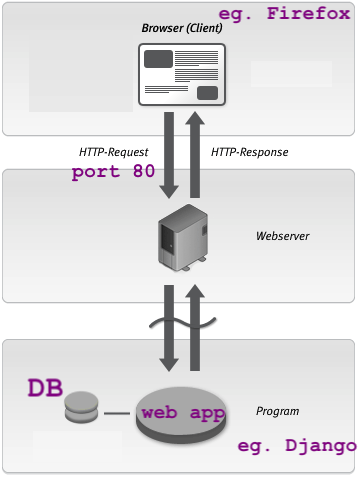 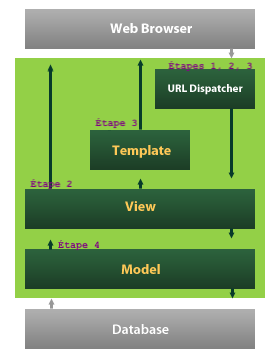

* Site web "statique" = fichier HTML que le server web relance lorsqu'un client web (eg. Firefox) le demande.
* Sous le capot, la demande que fait Firefox au serveur suit un processus de "requête - réponse" (request-response) qui fait partie du protocole HTTP (hypertext transfer protocol).
  * Firefox envoie un request GET vers le path /pageweb.html sur monsite.com
  * Le serveur web qui roule sur monsite.com recoit la requête et répond avec le contenu de la page (qui est du code HTML la plupart du temps, mais peut être aussi un des données .json dans le contexte d'un API, ou des données binaires comme le contenu d'un autre type de fichier).
  * Les détails varient selon les applications, mais l'idée générale reste la même: le client veut le contenu d'un resource e.g. /resources.ext, il fait un request **GET /resources.ext** au serveur, et le serveur lui répond avec ce contenu. 
  * Il n'y a vraiment pas de magie -- HTTP est juste une façon d'échanger des données entre deux ordinateurs
* application web = programme qui répond au requêtes HTTP
  * Contrairement aux sites web statiques, une application web peut répondre aux requêtes de façon dynamique, c-à-d n'est pas limitée à offrir la même réponse à chaque fois.
  * Par exemple, la requête  **GET /posts**  envoyée le Jan 1st au serveur web du blogue de Julie vous montrera une liste de trous posts: Post3, Post2, Post1 qui sont disponibles à cette date (les pensées de Julie exprimées sans frame bleu oppressant).Le même requête  **GET /posts**  envoyée le Fev 1st montrera quatre posts: Post4, Post3, Post2, Post1, où Post4 est un nouvel article que Julie à écrit durant le mois de janvier.
  * Les réponses dynamiques que le serveur renvoie au requêtes  **GET /posts** peuvent être générées en consultant la base de données associée au blog de Julie, qui contient tous les infos pour chaque post dans une "table" (structure de données similaire à ce qu'on peut voir dans un tableur comme LibreOffice--des rangées et des colonnes).
  * Le processus d'extractions des données d'une base de données pour répondre à une requête web peut être implémenté dans n'importe quel langage de programmation, mais historiquement les langages utilisés le plus souvent sont: PHP, Python, JavaScript, etc. 
  * Dans cet atelier, nous allons utiliser Python pour écrire des fonctions qui répondent aux requêtes web.
  * Le framework Django va nous aider ... chèque ben ça!  

## Étape 2: Création d'une vue

Création d'une vue = fonction Python dans  views.py qui répond à des request. Nous allons créer une vue qui répond par un message "Salut Montréal!" pour voir comment ça marche.

* Créer une fonction hello dans [monproj/monproj/views.py](./monproj/monproj/views.py) qui:
    - prend un l'objet `request` comme argument
    - retourne un `HttpResponse` qui contient le message "Salut Montréal!"
* Reliez la function hello à l'URL url http://localhost:8000/hello/ (`r'^hello/$'`) dans [monproj/monproj/urls.py](./monproj/monproj/urls.py)
  * Le fichier [urls.py](./monproj/monproj/urls.py) agit comme un «[switchboard](http://www.rcsigs.ca/images/9/90/Switchboard_UC_10.jpg)» pour acheminer les requêtes aux fonctions
* Voir [ce commit](https://github.com/mtlpy/ateliers-prog/commit/f1353442f166d4b6d4f005e754c1cef60671816f) pour le résultat de ces changements
* Retournez dans le notebook [01_b_runserver.ipynb](./01_b_runserver.ipynb)
  * assurez vous d'être àà bonne place:
    * `%pwd` (doit finir par `DjangoTutorialFR/monproj/`)
  * et roulez le serveur django
    * `!./manage.py runserver`

#### Verifications dans le fureteur
* Ouvrez votre fureteur web à la page [http://localhost:8000/hello/](http://localhost:8000/hello)
  * Vous devriez voir "Salut Montréal!"
* Dans votre fureteur, ouvrez l'onglet «developer console»:
  * Dans Firefox: `Ctrl Shift I` (sous Windows) ou `Ctrl Option I` (sous Mac)
  * Dans Chrome: `Ctrl Shift J` (sous Windows) ou `Ctrl Option J` (sous Mac)
  * Allez dans l'onglet Network et refaites la même requête
  * Explorez les sous-onglets Request et Response  

#### Verifications en utilisant du code

La libraries Python `requests` nous permet de faire la même chose que font les fureteurs web dans du code.

In [18]:
import requests

response = requests.get("http://localhost:8000/hello/")
print(response.text)

Salut Montréal!


In [19]:
response.headers

{'Date': 'Mon, 27 Jun 2022 16:32:10 GMT', 'Server': 'WSGIServer/0.2 CPython/3.6.9', 'Content-Type': 'text/html; charset=utf-8', 'X-Frame-Options': 'SAMEORIGIN', 'Content-Length': '16'}

#### Verifications en utilisant Postman

(demo si temps)


#### Exercice 2: modifier la fonction hello = /hello/ pour qu'elle accepte un paramètre nom

Fonctionnalité désirée:

* a requête /hello/?nom=Juliedevrait retourner la réponse "Salut Julie!"
* la requête /hello/   devrait retourner la réponse par défaut "Salut Montréal!"
* la requête /hello/?aaa=bbb   devrait aussi retourner la réponse par défaut "Salut Montréal!"  

Indices:

* L'objet request à contient un dictionnaire Python GET qui est continent tout les paramètres dans l'URL de la requête GET,   e.g. si la requête est `/hello/?key=value` alors request.GET sera `{"key":"value"}`
* Vous pouvez accéder les infos dans request.GET comme tout autre dict dans Python (les crochets `[]` pour demander la valeur pour une clé, e.g.  `request.GET["key"]` retournera "value"
* Une fois que vous avez extrait le nom de la personne, vous pouvez construire le message msg qui va dans la réponse HTTP de plusieures façons:
  * `msg = "Salut " + nom + "!"`
  * `msg = "Salut {nom}!".format(nom=nom)`
  * `msg = f"Salut {nom}!"`

Test URLs:Expected:

* [http://localhost:8000/hello/?nom=Julie](http://localhost:8000/hello/?nom=Julie)"Salut Julie"
* [http://localhost:8000/hello/](http://localhost:8000/hello/)"Salut Montréal!"
* [http://localhost:8000/hello/?aa=ff](http://localhost:8000/hello/?aa=ff)"Salut Montréal!"  

[Solution pour l'exercice 2](https://github.com/mtlpy/ateliers-prog/commit/7b47c82dec65709c9c0be5c34a335d4737d0ec41)  
  
  
  
  
  
  

----

Si vous avez complété l'[Exercice 1](https://docs.google.com/document/d/1VA6s5UpuEk_qc7MACX_XK1KyuGm1IWu7CF4p420vR58/edit#heading=h.xgby6tildtpa) alors vous savez l'essentiel de ce que c'est de créer une application web!

Le reste c'est juste des détails!  

Nous allons maintenant regarder deux "détails" très importants dans les étapes 3 et 4\.  
  
  
  
  

## Étape 3: Utiliser les gabarits HTML pour afficher les pages

Les réponses que renvoie notre application web pour l'URL /hello/ sont du texte simple (plain text), mais les sites web sont sensés retourner due code HTML (HypterText Markup Language) qui est le langage que les fureteurs web comprennent pour afficher le contenu riche (contenu structuré, metadata, entêtes, paragraphes, liens, images, etc.).  

Nous pouvons utiliser les gabarits HTML (templates) pour créer des reponses HTML aux requêtes:

* Créez un nouveau dossier `templates` dans dossier `monproj/monsite`
* Sauvegardez le contenu de [ce lien](https://raw.githubusercontent.com/mtlpy/ateliers-prog/main/DjangoTutorialFR/monproj/monsite/templates/homepage.html) dans le fichier [monproj/monsite/templates/homepage.html](./monproj/monsite/templates/homepage.html)

### Configurer le notebook pour les commades Django

Tout d'abord, assurons nous d'être dans le répertoire `DjangoTutorialFR/monproj`.

In [20]:
%pwd

'/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR'

In [21]:
%cd monproj

/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR/monproj


Les commandes suivantes vont configurer (setup) Djagno pour qu'on puisse utiliser les composantes de Django dans ce notebook.

In [22]:
import django
import os
import sys

sys.path.insert(0, os.getcwd())
os.environ["DJANGO_SETTINGS_MODULE"] = "monproj.settings"
os.environ["DJANGO_ALLOW_ASYNC_UNSAFE"] = "true"
django.setup()

On va maintenant tester que la commade `django.setup()` a fonctionné en verifiant que `monsite` est dans la liste `settings.INSTALLED_APPS`.

In [23]:
from django.conf import settings
settings.INSTALLED_APPS

['django.contrib.admin',
 'django.contrib.auth',
 'django.contrib.contenttypes',
 'django.contrib.sessions',
 'django.contrib.messages',
 'django.contrib.staticfiles',
 'monsite']

#### Test interactif du gabarit `"homepage.html"`

In [30]:
from django.template.loader import get_template

# aller chercher le template
template = get_template("homepage.html")

# valeurs pour le remplire
context = {
    "title": "le titre",
    "pitch": "le pitch",
}

# remplir le template avec les veleurs pour obtenir le HTML final
html = template.render(context)

# print(html)

### Ajoutons la fonction `homepage`
* Modifiez le fichier [monproj/monsite/views.py](./monproj/monsite/views.py) pour y ajouter la fonction `homepage`
* Modifiez le fichier [monproj/monproj/urls.py pour](./monproj/monproj/urls.py) relier l'URL / (`r'^$'`) à la fonction homepage
* Voir [ce commit](https://github.com/mtlpy/ateliers-prog/commit/fdd0b49836868714d1104249943caee3b1373f3b) pour la combinaison de ces changements

#### Verifications

* Visitez [http://localhost:8000/](http://localhost:8000/)

#### Exercice 3: modifier la fonction homepage = /  pour y ajouter le titre et le pitch qui décrit vos recommandations de livres

* Le gabarit [monproj/monsite/templates/homepage.html](./monproj/monsite/templates/homepage.html) prend comme paramètres les valeurs suivantes:
  * title: le nom de la liste de livres
  * pitch: une ou deux phrases qui expliquent quels types
* En changeant les valeurs dans le dictionnaire context, nous pouvons afficher différentes informations  
* Modifiez la fonction homepage dans le fichier [monproj/monsite/views.py](./monproj/monsite/views.py) pour changer les valeurs `title` et `pitch` dans le dictionnaire `context`
* Visitez [http://localhost:8000/](http://localhost:8000/) pour voir la résultat de vos changements  
  
  

----

Le site web de votre liste de livres est quasiment prêt!

Il faudrait juste ajouter la liste des livres ;)

### Un peu de théorie sur les bases de données...

* les bases de données (database ou DB en anglais) sont une façon d'enregistrer les données de façon structurée
* les bases de données les plus souvent utilisées sont PostgreSQL, MySQL, et sqlite3
  * Notez que tous ces noms contiennent "SQL" qui est un acronyme pour Structured Query Language --- c'est le langage utilisé pour accéder (SELECT), créer (CREATE), ou modifier (UPDATES) les données
* une "table" dans une base de données est un peu comme un tableur (penser LibreOffice)
  * chaque table est associée à un "schéma" qui définit le noms des colonnes et le types d'information qu'on peut y placer  
  

### Étape 4: Créer et lire des données stockées dans une base de données

Nous allons maintenant écrire le "code modèle" qui nous permet de créer et lire des données stockées dans une base de données. Par convention, le code modèle s'écrit dans dans le fichier models.py, et nous allons créer une classe Python pour chaque type de donnée que nous voulons traiter.

* Modifiez le fichier monproj/monsite/models.py pour y ajouter une [le modèle Book](https://github.com/mtlpy/ateliers-prog/commit/24dbb2180df20af8f070096f0ea54e40d2ac5630)
* Roulez les commandes:
  * !./manage.py makemigrations
  * !./manage.py migrate

### Créer le modèle Books

Modifiez le fichier [monproj/monsite/models.py](./monproj/monsite/models.py) pour y ajouter les lignes suivantes


### Créer et appliquer les migrations

In [34]:
%pwd

'/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR'

In [35]:
%cd monproj

/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR/monproj


In [36]:
!./manage.py makemigrations

No changes detected


In [37]:
!./manage.py migrate

Operations to perform:
  Apply all migrations: admin, auth, contenttypes, monsite, sessions
Running migrations:
  Applying monsite.0001_initial... OK


In [38]:
%cd ..

/Users/ivan/Projects/Minireference/software/ateliers-prog/DjangoTutorialFR


### Créer des objets `Book`

In [39]:
from monsite.models import Book

In [40]:
Book.objects.all()

<QuerySet []>

In [42]:
book1 = Book.objects.create(title="Titre du livre", author="Auteur 1")
book1.save()

In [43]:
book2 = Book.objects.create(title="autre titre", author="Auteur 2")
book2.save()

In [41]:
book3 = Book.objects.create(title="titre 3", author="Auteur 3", description="Ceci est un bon livre")
book3.save()

In [45]:
books = Book.objects.all()
books

<QuerySet [<Book: Book object (1)>, <Book: Book object (2)>, <Book: Book object (3)>]>

In [47]:
book = books[2]
book

<Book: Book object (3)>

In [50]:
book.title, book.author, book.description

('autre titre', 'Auteur 2', '')

### Interface admin de Django

* Setup l'interface admin de Django:
  * Ajouter les [lignes suivantes](https://github.com/mtlpy/ateliers-prog/commit/68fd6d90813dbc29304ce8151656e9749a693cad) au fichier  monproj/monsite/admin.py
  * Visitez [http://localhost:8000/admin/](http://localhost:8000/admin/) et utilisez "admin" et "admin123" pour le log in
* Créez quelques nouveaux livres en utilisant [http://localhost:8000/admin/monsite/book/add/](http://localhost:8000/admin/monsite/book/add/)

#### Verification
Vérifiez que les livres sont créés en roulant les commandes

In [52]:
books = Book.objects.all()
books

<QuerySet [<Book: Book object (1)>, <Book: Book object (2)>, <Book: Book object (3)>]>

### Creation de la vue `/books/` qui montre la liste des livres

Créons maintenant une nouvelle vue `books` = `/books/` qui retourne une page HTML qui montre la liste des livres que nous avons dans la base de données.

* Créez un nouveau gabarit monproj/monsite/templates/books.html en téléchargeant [ce fichier](https://raw.githubusercontent.com/mtlpy/ateliers-prog/9365e7eb4a3eaaf4cbf00c2856c6e5e11b3eccef/DjangoTutorialFR/monproj/monsite/templates/books.html)
* Le gabarit [monproj/monsite/templates/books.html](./monproj/monsite/templates/books.html) s'attend à recovoir comme paramètre une liste de livres nomée `books`
* Ajoutez la [vue books](https://github.com/mtlpy/ateliers-prog/commit/890a1da92105889adb9d26da919661d9e8843524) dans [monproj/monsite/views.py](./monproj/monsite/views.py)
  * Importer le modèle Book dans [monproj/monsite/views.py](./monproj/monsite/views.py) en utilisant
    * `from monsite.models import Book`
  * Obtenez un queryset iterable de tous les livres utilisant (les queryset c'est un peu comme les listes, càd on peut les utiliser dans des for loop)
    * `books = Book.objects.all()`
* Modifiez le fichier [monproj/monproj/urls.py](./monproj/monproj/urls.py) pour relier l'URL `/books/` (regex `r'^books/$'`) à la vue `books` que vous venez de créer
* Visitez [http://localhost:8000/books/](http://localhost:8000/books/)  
  
  

#### Exercice 4: modifier l'affichage de la liste des livres

Fonctionnalité désirée:

* on veut que la requête [/books/](http://localhost:8000/books/) retourne le non seulement le titre, mais aussi l'**author**, et la **description** pour chaque livre  

Indices:

* Vous n'aurez qu'à modifier le gabarit [monproj/monsite/templates/books.html](./monproj/monsite/templates/books.html)
* Accéder au propriétés de chaque objet book en utilisant le point (comme les attributs dans Python de base, eg: `book.author`)
* Insérez les valeurs dans le HTML en utilisant les accolades `{{ }}`   


Test URLs:
* [http://localhost:8000/books/](http://localhost:8000/books/) doit montrer les infos pour chaque livre incluant **author** et **description**  

[Solution de l'exercice 4](https://github.com/mtlpy/ateliers-prog/commit/33d45eba0dc29bdfa09971489e52886c8c284e54)  




## Autres sujets Django (pour une prochaine fois peut-être...):

Nous n'avons pas le temps de discuter de ces sujets, mais la doc Django est excellente alors vous pouvez apprendre par vous même là dessus:

* [Formulaires](https://docs.djangoproject.com/fr/4.0/topics/forms/) (<form\> submission envoyée comme une requête de type POST)
  * [exemple](https://docs.djangoproject.com/fr/4.0/intro/tutorial04/#write-a-minimal-form)
* [Déploiement](https://docs.djangoproject.com/fr/4.0/howto/deployment/) sur un serveur en ligne
  * (demo existing site if time)
* [Migrations](https://docs.djangoproject.com/fr/4.0/topics/migrations/)
* [File uploads](https://docs.djangoproject.com/fr/4.0/topics/http/file-uploads/)
* [Vues fondées sur les classes](https://docs.djangoproject.com/fr/4.0/topics/class-based-views/)
* [Tests](https://docs.djangoproject.com/fr/4.0/topics/testing/)
* [APIs](https://www.django-rest-framework.org/)
* [Sécurité](https://docs.djangoproject.com/fr/4.0/topics/security/)
  * Connections HTTPS et certificats (des taches faites par le server web)
  * CSRF tokens
  * Authentication (Session login)
  * Authorization (permissions)
* [Internationalisation et régionalisation](https://docs.djangoproject.com/fr/4.0/topics/i18n/)  

## Ressources pour en apprendre plus

* [Tutoriel de Django Girls](https://tutorial.djangogirls.org/fr/)
* [Django docs](https://docs.djangoproject.com/en/4.0/)
  * [Django tutorial](https://docs.djangoproject.com/en/4.0/intro/tutorial01/)
  * [Topic guides](https://docs.djangoproject.com/en/4.0/topics/)
  * [Django référence](https://docs.djangoproject.com/en/4.0/ref/)
* [Apprendre le Développement Web avec Python](https://www.youtube.com/watch?v=vN3_jywhg_E) (vidéo 2h)
* [Tutoriel Django (Français) Développement Web avec Python](https://www.youtube.com/playlist?list=PLEn9o0UAh_cCszR1kXFAe-4lxkJjCnAiH) (liste de 6 vidéos)  


### Outils pour la programmation web:
* Postman [https://www.postman.com/downloads/](https://www.postman.com/downloads/)
* VSCode  
